In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#droping uncessaray column
df.drop(columns='Id',inplace=True)

In [ ]:
#encoding the target variable
label_encoder=LabelEncoder()
df['Species']=label_encoder.fit_transform(df['Species'])

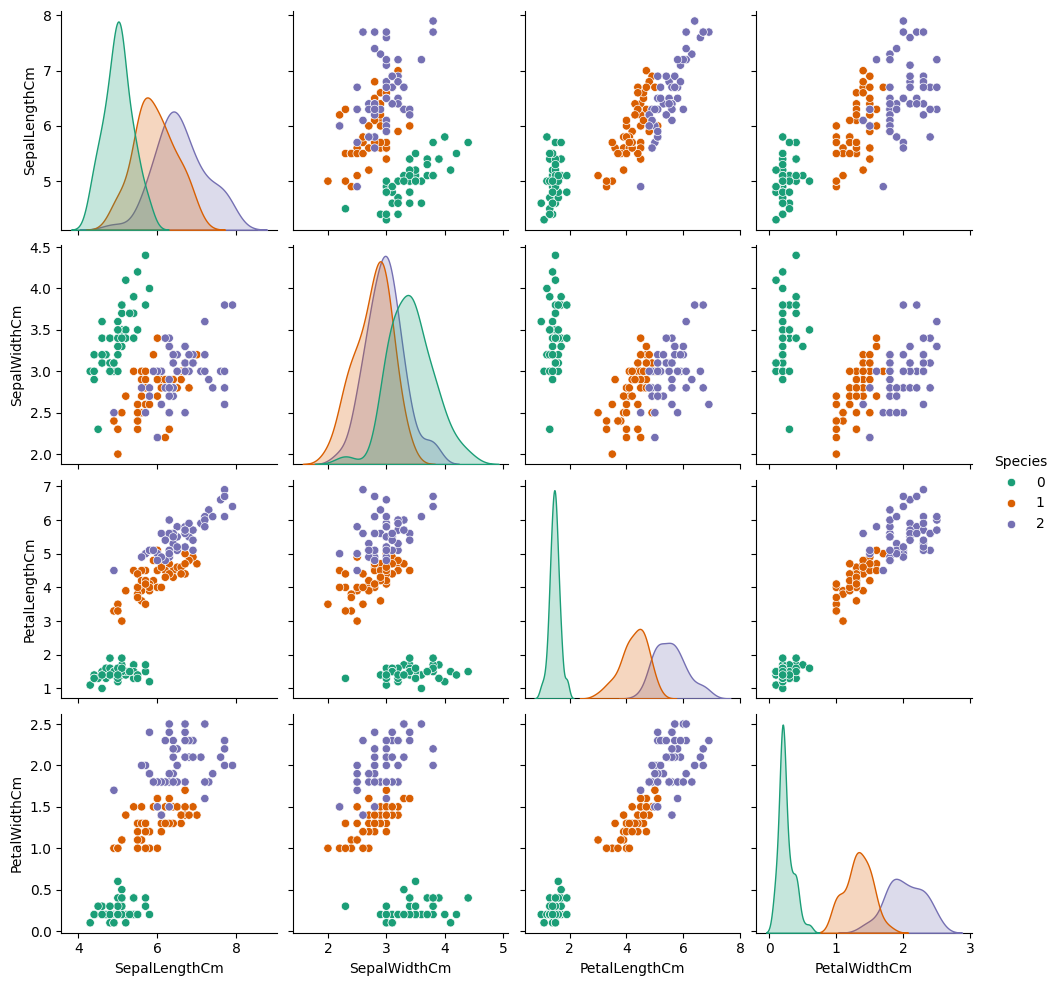

In [ ]:
#EDA
sns.pairplot(df,hue='Species', palette='Dark2')
plt.show()


In [ ]:
X=df.drop('Species',axis=1)
y=df['Species']

In [ ]:
#Spilting the train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
#Training a randomforest
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Making Prediction
y_pred=model.predict(X_test)


In [ ]:
#Evaluate model Performance
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)

In [ ]:
#printing the result
print(f'Accuracy:{accuracy}')
print('Classification Report:\n',report)
print('Confusion Matrix:\n',conf_matrix)

Accuracy:0.9
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]


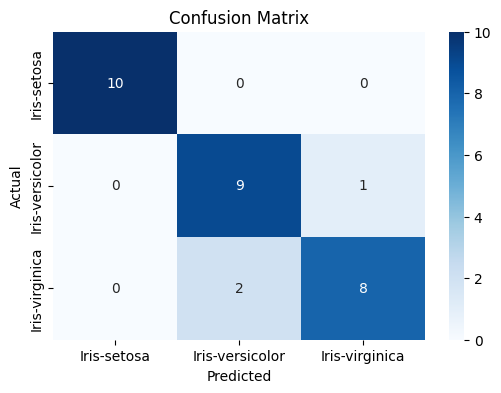

In [ ]:
#visualization confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',xticklabels=label_encoder.classes_,yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Feature Importance
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": model.feature_importances_})
feature_importances.sort_values(by="Importance", ascending=False, inplace=True)

<ipython-input-68-4638a323b62c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances['Importance'],y=feature_importances['Feature'],palette='viridis')


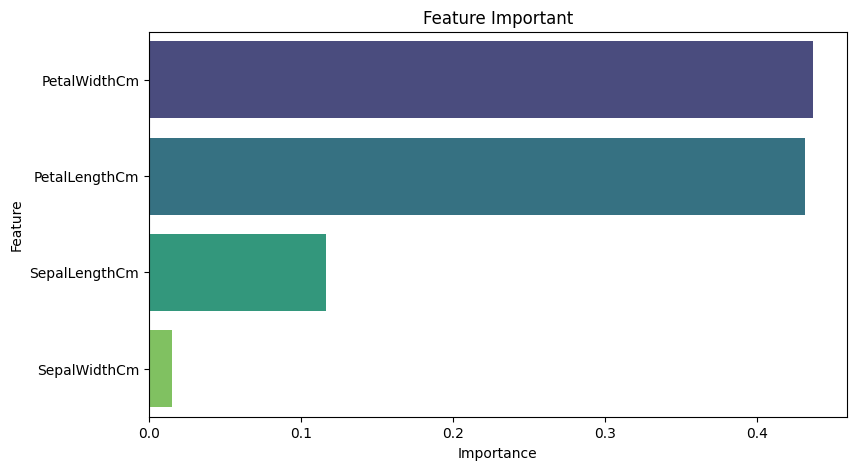

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(x=feature_importances['Importance'],y=feature_importances['Feature'],palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Important')
plt.show()